## Section 1, Part a: Reading Data 

### Learning Objective(s)

 - Create a SQL database connection to a sample SQL database, and read records from that database
 - Explore common input parameters

### Packages

 - [Pandas](https://pandas.pydata.org/pandas-docs/stable/)
 - [Pandas.read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)
 - [SQLite3](https://docs.python.org/3.6/library/sqlite3.html)

## Simple data reads

Structured Query Language (SQL) is an [ANSI specification](https://docs.oracle.com/database/121/SQLRF/ap_standard_sql001.htm#SQLRF55514), implemented by various databases. SQL is a powerful format for interacting with large databases efficiently, and SQL allows for a consistent experience across a large market of databases. We'll be using sqlite, a lightweight and somewhat restricted version of sql for this example. sqlite uses a slightly modified version of SQL, which may be different than what you're used to. 

In [ ]:
# Imports
import sqlite3 as sq3
# import pandas.io.sql as pds
import pandas as pd

### Database connections

Our first step will be to create a connection to our SQL database. A few common SQL databases used with Python include:

 - Microsoft SQL Server
 - Postgres
 - MySQL
 - AWS Redshift
 - AWS Aurora
 - Oracle DB
 - Terradata
 - Db2 Family
 - Many, many others
 
Each of these databases will require a slightly different setup, and may require credentials (username & password), tokens, or other access requirements. We'll be using `sqlite3` to connect to our database, but other connection packages include:

 - [`SQLAlchemy`](https://www.sqlalchemy.org/) (most common)
 - [`psycopg2`](http://initd.org/psycopg/)
 - [`MySQLdb`](http://mysql-python.sourceforge.net/MySQLdb.html)

In [ ]:
# Initialize path to SQLite database
path = 'data/classic_rock.db'
con = sq3.Connection(path)

# We now have a live connection to our SQL database

In [ ]:
con

### Reading data

Now that we've got a connection to our database, we can perform queries, and load their results in as Pandas DataFrames

In [ ]:
# Write the query
query = '''
SELECT * 
FROM rock_songs;
'''

# Execute the query
observations = pd.read_sql(query, con)

observations.head()

In [ ]:
# We can also run any supported SQL query
# Write the query
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pd.read_sql(query, con)

observations.head()

## Common parameters

There are a number of common paramters that can be used to read in SQL data with formatting:

 - coerce_float: Attempt to force numbers into floats
 - parse_dates: List of columns to parse as dates
 - chunksize: Number of rows to include in each chunk
 
Let's have a look at using some of these parameters

In [ ]:
query='''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations_generator = pd.read_sql(query,
                            con,
                            coerce_float=True, # Doesn't effect this dataset, because floats were correctly parsed
                            parse_dates=['Release_Year'], # Parse `Release_Year` as a date
                            chunksize=5 # Allows for streaming results as a series of shorter tables
                            )

print(observations_generator)

for index, observations in enumerate(observations_generator):
    if index < 5:
        print(f'Observations index: {index}')
        display(observations)

## Section 1, Part b: Reading Data Lab

In [ ]:
# Imports
import sqlite3 as sq3
import pandas as pd

## Lab Exercise: Reading in database files

 - Create a variable, `path`, containing the path to the `baseball.db` contained in `resources/`
 - Create a connection, `con`, that is connected to database at `path`
 - Create a variable, `query`, containing a SQL query which reads in all data from the `allstarfull` table
 - Create a variable, `observations`, by using pandas' [read_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html)

### Optional
 - Create a variable, `tables`, which reads in all data from the table `sqlite_master`
 - Pretend that you were interesting in creating a new baseball hall of fame. Join and analyze the tables to evaluate the top 3 all time best baseball players.

In [ ]:
### BEGIN SOLUTION
# Create a variable, `path`, containing the path to the `baseball.db` contained in `resources/`
path = 'data/baseball.db'

# Create a connection, `con`, that is connected to database at `path`
con = sq3.Connection(path)

# Create a variable, `query`, containing a SQL query which reads in all data from the `` table

query = """
SELECT *
    FROM allstarfull
    ;
"""

observations = pd.read_sql(query, con)

print(observations)


In [ ]:
# Create a variable, tables, which reads in all data from the table sqlite_master
all_tables = pd.read_sql('SELECT * FROM sqlite_master', con)
print(all_tables)
print()

# Pretend that you were interesting in creating a new baseball hall of fame. Join and analyze the tables to evaluate the top 3 all time best baseball players
best_query = """
SELECT playerID, sum(GP) AS num_games_played, AVG(startingPos) AS avg_starting_position
    FROM allstarfull
    GROUP BY playerID
    ORDER BY num_games_played DESC, avg_starting_position ASC
    LIMIT 3
"""
best = pd.read_sql(best_query, con)
print(best.head())

# Data Cleaning

Estimated time needed: **45** minutes

Most of the real-world data, that the data scientist work with, are raw data, meaning that it can contain repeated, missing, and irrelevant entries of information. Hence, if this data is used in any machine learning analysis, it will result in low accuracy or incorrect prediction. For this reason, data cleaning, also known as data cleansing, is an important technique that comes prior to any model building. 

In this notebook, we will take a look at some of the common data cleaning techniques that data scientists may use to prepare their data for analysis.

## Objectives

After completing this lab you will be able to:

*   Use Log function to transform the data
*   Handle the duplicates
*   Handle the missing values
*   Standardize and normalize the data
*   Handle the outliers



***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for statistical computations.


## **Import the required libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
# Any plot generated will be displayed in the notebook
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

In [ ]:
# Increase the display width so that all columns are displayed
# pd.set_option('display.width', 500)

## **Reading and understanding our data**


For this lab, we will be using the Ames_Housing_Data.tsv file, hosted on IBM Cloud object storage. The Ames housing dataset examines features of houses sold in Ames (a small city in the state of Iowa in the United States) during the 2006–2010 timeframe.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [ ]:
housing = pd.read_csv("data/Ames_Housing_Data.tsv", sep='\t')
housing.head(10)

We can find more information about the features and types using the `info()`  method.


In [ ]:
housing.info()

According to the output above, we have 2931 entries, 0 to 2930, as well as 81 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 2931 then there is no missing values for that particular feature. 'SalePrice' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (28 int64 and 11 float64) and object data types. 


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [ ]:
housing["SalePrice"].describe()

From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section. 


## Exercise 1


The `describe()` function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use `value_counts()` function. In this exercise, describe all categories of the 'Sale Condition' attribute.


In [ ]:
# Enter your code and run the cell
housing["Sale Condition"].value_counts()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
 housing["Sale Condition"].value_counts()
</code>
</details>


## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [ ]:
# Select the columns having numerical data types
house_num = housing.select_dtypes(include = ['float64', 'int64'])

# .corr()               -- Finds the pairwise correlation of all columns
# ['SalePrice']         -- Select only the correlation of SalePrice with other variables
# [:-1]                 -- Slice the last row because it contains the correlation of SalePrice with SalePrice which is always 1
house_num_corr = house_num.corr()['SalePrice'][:-1]

# abs()                 -- Find the absolute value of all the correlations because we are interested in the magnitude of the correlation
# > 0.5                 -- Select only the correlations whose magnitude is greater than 0.5 because they are considered to be strongly correlated
# .sort_values          -- Sort the values in descending order
top_features = house_num_corr[abs(house_num_corr) > 0.5].sort_values(ascending=False)
print(f'There is {len(top_features)} strongly correlated values with SalePrice:\n{top_features}')

Above, there are 11 features, with coefficients greater than 0.5, that are strongly correlated with the sale price. 


Next, let's generate some pair plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


In [ ]:
for i in range(0, len(house_num.columns),5):

    sns.pairplot(data=house_num,
                x_vars=house_num.columns[i:i+5],
                y_vars=['SalePrice'])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data is normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'SalePrice' distribution using the `distplot()` function from the `seaborn` library.


In [ ]:
sp_untransformed = sns.displot(housing['SalePrice'])

As the plot shows, our 'SalePrice' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


Here, we can simply use the `skew()` function to calculate our skewness level of the `SalePrice`.


In [ ]:
print("Skewness: %f" % housing['SalePrice'].skew())

The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data. 

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) contains more information about the numpy log transform.


In [ ]:
log_transformed = np.log(housing['SalePrice'])

In [ ]:
sp_transformed = sns.displot(log_transformed)

In [ ]:
print("Skewness: %f" % (log_transformed).skew())

As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range. 

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


## Exercise 2


In this exercise, visually inspect the 'Lot Area' feature. If there is any skewness present, apply log transform to make it more normally distributed.


In [ ]:
# Enter your code and run the cell
print(f'Skewness of Lot Area: {housing['Lot Area'].skew()}. First plot shows the distribution of Lot Area')
sns.displot(housing['Lot Area'])

transformed_lot_area = np.log(housing['Lot Area'])
print(f'Skewness of transformed Lot Area: {transformed_lot_area.skew()}. Second plot shows the distribution of transformed Lot Area')
sns.displot(transformed_lot_area)


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
la_plot = sns.distplot(housing['Lot Area'])
print("Skewness: %f" % housing['Lot Area'].skew())
la_log = np.log(housing['Lot Area'])
print("Skewness: %f" % la_log.skew())

</code>
</details>


## **Handling the Duplicates**


As mentioned in the video, having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function and search by the 'PID' column, which contains a unique index number for each entry.


In [ ]:
duplicate = housing[housing.duplicated(['PID'])]
duplicate

As we can see, there is one duplicate row in this dataset. To remove it, we can use pandas `drop_duplicates()` function. By default, it removes all duplicate rows based on all the columns.


In [ ]:
dup_removed = housing.drop_duplicates()
dup_removed 

An alternative way to check if there are any duplicated Indexes in our dataset is using `index.is_unique` function.


In [ ]:
housing.index.is_unique

## Exercise 3


In this exercise try to remove duplicates on a specific column by setting the subset equal to the column that contains the duplicate, such as 'Order'.


In [ ]:
# Enter your code and run the cell
#Check if the 'Order' column has duplicate values
print(housing['Order'].is_unique)

# Yes, the 'Order' column has duplicate values
# Find the duplicate values in the 'Order' column
print(housing[housing.duplicated(['Order'])])

# Drop the duplicate values in the 'Order' column
housing.drop_duplicates(subset=['Order'])

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
removed_sub = housing.drop_duplicates(subset=['Order'])
</code>
</details>


## **Handling the Missing Values**


### Finding the Missing Values


For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the `bar plot` function from the `matplotlib` library.


In [ ]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar")

plt.xlabel("Columns")
plt.ylabel("Count")
plt.title("Total Missing Values")
plt.tight_layout()
plt.show()

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.


1. We can drop the missing values, using `dropna()` method.


In [ ]:
housing.dropna(subset=["Lot Frontage"])

Using this method, all the rows, containing null values in 'Lot Frontage' feature, for example, will be dropped. 


2. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.


In [ ]:
housing.drop("Lot Frontage", axis=1)

Using this method, the entire column containing the null values will be dropped. 


3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.


In [ ]:
median = housing["Lot Frontage"].median()
median

In [ ]:
housing["Lot Frontage"] = housing["Lot Frontage"].fillna(median)

In [ ]:
housing.tail()

Index# 2927, containing a missing value in the "Lot Frontage", now has been replaced with the median value.


## Exercise 4


In this exercise, let's look at 'Mas Vnr Area' feature and replace the missing values with the mean value of that column.


In [ ]:
# Enter your code and run the cell
housing['Mas Vnr Area'] = housing['Mas Vnr Area'].fillna(housing['Mas Vnr Area'].mean())

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
mean = housing["Mas Vnr Area"].mean()
housing["Mas Vnr Area"].fillna(mean, inplace = True)   
</code>
</details>


## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.



Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) please visit their respective documentation websites. 


First, we will normalize our data.


In [ ]:
norm_data = MinMaxScaler().fit_transform(house_num)
norm_data

Note the data is now a `ndarray` 


we can also standardize our data.


In [ ]:
scaled_data = StandardScaler().fit_transform(house_num)
scaled_data

## Exercise 5


In this exercise, use `StandardScaler()` and `fit_transform()` functions to standardize the 'SalePrice' feature only.


In [ ]:
# Enter your code and run the cell
housing['SalePrice'] = StandardScaler().fit_transform(housing[['SalePrice']])
housing['SalePrice']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
scaled_sprice = StandardScaler().fit_transform(housing['SalePrice'][:,np.newaxis]) 
scaled_sprice
</code>
</details>



## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots. 


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Here, we will use a box plot for the 'Lot Area' and the 'SalePrice' features. 


In [ ]:
sns.boxplot(x=housing['Lot Area'])

In [ ]:
sns.boxplot(x=housing['SalePrice'])

As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'Lot Area' and the 'Sale Price' might be the actual true data points and do not need to be removed.


### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters. 


In [ ]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

From the above graph, there are two values above 5000 sq. ft. living area that deviate from the rest of the population and do not seem to follow the trend. It can be speculated why this is happening but for the purpose of this lab we can delete them. 

The other two observations on the top are also deviating from the rest of the points but they also seem to be following the trend, so, perhaps, they can be kept.


### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [ ]:
housing.sort_values(by = 'Gr Liv Area', ascending = False)[:2]

Now we will use the pandas `drop()` function to remove these two rows.


In [ ]:
outliers_dropped = housing.drop(housing.index[[1499,2181]])

In [ ]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

As you can see, we do not have the last two points of the 'Gr Liv Area' anymore.


## Exercise 6


In this exercise, determine whether there are any outliers in the 'Lot Area' feature. You can either plot the box plot for the 'Lot Area', perform a bi-variate analysis by making a scatter plot between the 'SalePrice' and the 'Lot Area', or use the Z-score analysis. If there are any outliers, remove them from the dataset.


In [ ]:
# Enter your code and run the cell
sns.boxplot(x=housing['Lot Area'])

new_plot = housing.plot.scatter(x='Lot Area',
                                        y='SalePrice')

outliers_dropped = housing.drop(housing[housing['Lot Area'] > 100000].index)

new_plot = outliers_dropped.plot.scatter(x='Lot Area',
                                        y='SalePrice')

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
sns.boxplot(x=housing['Lot Area'])
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')   
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area'])
housing[['Lot Area','Lot_Area_Stats']].describe().round(3)
housing.sort_values(by = 'Lot Area', ascending = False)[:1]
lot_area_rem = housing.drop(housing.index[[957]])
</code>
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
There seems to be one outlier, the very last point in the 'Lot Area' is too far from the rest of the group. Also, according to the Z-score, the standard deviation of that point exceeds the threshhold of 3.
</code>
</details>


## Z-score Analysis


Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) site. 


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


In [ ]:
housing['LQFSF_Stats'] = stats.zscore(housing['Low Qual Fin SF'])
housing[['Low Qual Fin SF','LQFSF_Stats']].describe().round(3)

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 22.882 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.


## Section 1, Part c: EDA Lab

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [ ]:
import os
import numpy as np
import pandas as pd

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [ ]:
filepath = "data/iris_data.csv"
data = pd.read_csv(filepath)
data.head()

In [ ]:
### BEGIN SOLUTION
# Number of rows
print(f'(rows, column) = {data.shape}')

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [ ]:
### BEGIN SOLUTION
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()
### END SOLUTION

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [ ]:
### BEGIN SOLUTION
# One way to count each species
data['species'].value_counts()
#OR
data.species.value_counts()

In [ ]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data.describe()

stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df
### END SOLUTION

## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [ ]:
### BEGIN SOLUTION
# The mean calculation
data.groupby('species').mean()

In [ ]:
# The median calculation
data.groupby('species').median()

In [ ]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
#data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

In [ ]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)
### END SOLUTION

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [ ]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');
### END SOLUTION

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

In [ ]:
### BEGIN SOLUTION
# Using Matplotlib's plotting functionality
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

In [ ]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');
### END SOLUTION

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

In [ ]:
import seaborn as sns
sns.set_context('notebook')
### BEGIN SOLUTION
# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [ ]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25, figsize=(20, 10))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

In [ ]:
### BEGIN SOLUTION
# Here we have four separate plots
data.boxplot(by='species', figsize=(12, 6));
### END SOLUTION

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [ ]:
### BEGIN SOLUTION
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(10,8))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);
### END SOLUTION

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

In [ ]:
### BEGIN SOLUTION
sns.set_context('talk')
sns.pairplot(data, hue='species')
### END SOLUTION

# **Exploratory Data Analysis**


Estimated time needed: **30** minutes

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

In this notebook, we will learn some interesting and useful data exploration techniques that can be applied to explore any geographical data.


## Objectives


*After completing this lab you will be able to:*

*   Do Data Wrangling
*   Do Data Filtering 
*   Plot with <code>plotly.express</code>
*   Produce choropleth map


***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/) for managing the data.
 - [`plotly.express`](https://plotly.com/python/plotly-express/) for visualizing the data.
 - [`json`](https://docs.python.org/3/library/json.html/) for reading json file formats.
 


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd
import plotly.express as px
import datetime 
import requests
import json

## **Reading and understanding our data**


The dataset in this lab is <a href="https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000101">Monthly average retail prices for gasoline and fuel oil, by geography</a>  . It is available through Statistics Canada and includes monthly average gasoline price (Cents per Litre), of major Canadian Cities, starting from 1979 until recent. 


Another dataset, <a href="https://thomson.carto.com/tables/canada_provinces/public/map">canada_provinces.geojson</a>, contains the mapping information of all Canadian Provinces. It will be used in our analysis to produce a choropleth map. 


Let's read the data into *pandas* dataframe and look at the first 5 rows using the `head()` method. 


In [ ]:
gasoline = pd.read_csv("data/gasoline_prices.csv")
gasoline.head()

Let's find out how many entries there are in our dataset, using `shape` function.


In [ ]:
gasoline.shape

Using `info` function, we will take a look at our types of data.


In [ ]:
gasoline.info()

Using `columns` method, we will print all the column names.


In [ ]:
gasoline.columns

Below, we will check for any missing values.


In [ ]:
gasoline.isnull().sum()

## **Data Wrangling** 
### Selecting and renaming the columns of interest


Below, we are filtering our data, by selecting only the relevant columns. Also, we are using the `rename()` method to change the name of the columns.


In [ ]:
data = (gasoline[['REF_DATE','GEO','Type of fuel','VALUE']]).rename(columns={"REF_DATE" : "DATE", "Type of fuel" : "TYPE"})
data.head()

### Splitting the columns


The `str.split()` function splits the string records, by a 'comma', with `n=1` slplit, and <code>Expend=True</code> , returns a dataframe. Below, we are splitting 'GEO' into 'City' and 'Province'.


In [ ]:
data[['City', 'Province']] = data['GEO'].str.split(',', n=1, expand=True)

In [ ]:
data.head()

### Changing to *datetime* format


If we scroll up to our `gasoline.info()` section, we can find that  'REF_DATE' is an object type. To be able to filter by day, month, or year, we need to change the format from object type to *datetime*. Pandas function `to_datetime()` transforms to date time format. Also, we need to specify the format of *datetime* that we need. In our case, `format='%b-%y'` means that it will split into the name of a month and year. `str.slice(stop=3)` splits and outputs the first 3 letters of a month. For more information on how to transform to *datetime*, please visit [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) pandas documentation. Also, [this](https://strftime.org) web page contains more information on *datetime* formats.


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%b-%y')
data['Month'] = data['DATE'].dt.month_name().str.slice(stop=3)
data['Year'] = data['DATE'].dt.year

In [ ]:
data.head()

The `describe()` function provides statistical information about the numeric variables. Since we only have the 'VALUE' variable that we want statistical information on, we will filter it by `data.VALUE.describe()` function.


In [ ]:
data.VALUE.describe()
# can also use  data['VALUE'].describe()

Now, it is useful to know what is inside our categorical variables. We will use `unique().tolist()` functions to print out all of our 'GEO' colunm.


In [ ]:
data.GEO.unique().tolist()
# can also use  data['GEO'].unique().tolist()

## Exercise 1


In this exercise, print out all categories in 'TYPE' column.


In [ ]:
# Enter your code and run the cell
data.TYPE.unique().tolist()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
data.TYPE.unique().tolist()
</code>
</details>


## **Data Filtering** 


This section will introduce you to some of the most common filtering techniques when working with pandas dataframes.


### Filtering with logical operators


We can use the logical operators on column values to filter rows. First, we  specify the name of our data, then, square brackets to select the name of the column, double 'equal' sign, '==' to select the name of a row group, in single or double quotation marks. If we want to exclude some entries (e.g. some locations), we would use the 'equal' and 'exclamation point' signs together, '=!'. We can also use '</>', '<=/>=' signs to select numeric information.

Let's select the Calgary, Alberta data to see all the information.


In [ ]:
calgary = data[data['GEO'] == 'Calgary, Alberta']
calgary

Now, let's select 2000 year.


In [ ]:
sel_years = data[data['Year'] ==  2000]
sel_years

### Filtering by multiple conditions


There are many alternative ways to perform filtering in pandas. We can also use '|' ('or') and '&' (and) to select multiple columns and rows. 


For example, let us select Toronto and Edmonton locations.


In [ ]:
mult_loc = data[(data['GEO'] == "Toronto, Ontario") | (data['GEO'] == "Edmonton, Alberta")]
mult_loc

Alternatively, we can use `isin` method to select multiple locations.


In [ ]:
cities = ['Calgary', 'Toronto', 'Edmonton']
CTE = data[data.City.isin(cities)]
CTE

## Exercise 2 a


In this exercise, please use the examples shown above, to select the data that shows the price of the 'household heating fuel', in Vancouver, in 1990.


In [ ]:
# Enter your code below and run the cell
price = data[(data['TYPE'] == 'Household heating fuel') & (data['City'] == 'Vancouver') & (data['Year'] == 1990)]
price

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise2a = data[( data['Year'] ==  1990) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2a
</code>
</details>


## Exercise 2 b


In this exercise, please select the data that shows the price of the 'household heating fuel', in Vancouver, in the years of 1979 and 2021.


In [ ]:
# Enter your code below and run the cell
# Enter your code below and run the cell
price = data[(data['TYPE'] == 'Household heating fuel') & (data['City'] == 'Vancouver') & ((data['Year'] == 1979) | (data['Year'] == 2021))]
price

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise2b = data[( data['Year'] <=  1979) | ( data['Year'] ==  2021) & (data['TYPE'] == "Household heating fuel") & (data['City']=='Vancouver')]
exercise2b
</code>
</details>


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
If we use '&' operator between the two years, it will return an empty data frame. This is because there was no data for the 'household heating fuel, in Vancouver, in 1979. Using 'or' operator is suitable because either one of two years that contains any information on 'household heating fuel' in Vancouver.
</code>
</details>


### Filtering using `groupby()` method


The role of `groupby()` is to analyze data by some categories. The simplest call is by a column name. For example, let’s use the 'GEO' column and `ngroups` function to calculate the number of groups (cities, provinces) in 'GEO' column.


In [ ]:
geo = data.groupby('GEO')
geo.ngroups

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.


In [ ]:
group_year = data.groupby(['Year'])['VALUE'].mean()
group_year

## Exercise 3 a


In the cell below, please use `groupby()` method to group by the maximum value of gasoline prices, for each month. 


In [ ]:
# Enter your code below and run the cell
ans = data.groupby(['Year', 'City'])['VALUE'].max()
ans

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise3a = data.groupby(['Month'])['VALUE'].max()
</code>
</details>


## Exercise 3 b


In the cell below, please use `groupby()` method to group by the median value of gasoline prices, for each year and each city. 


In [ ]:
# Enter your code below and run the cell
price_bycity = data.groupby(['Year', 'City'])['VALUE'].median().reset_index(name ='Value').round(2)
price_bycity

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
exercise3b = data.groupby(['Year', 'City'])['VALUE'].median()
</code>
</details>


<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
    
We can also reset the index of the new data output, by using `reset_index()`, and round up the output values to 2 decimal places.

exercise3b = data.groupby(['Year', 'City'])['VALUE'].median().reset_index(name ='Value').round(2)

</code>
</details>


## **Visualizing the data with *pandas* plotly.express** 


The *plotly.express* library (usually imported as px) contains functions that can create entire figures at once. *plotly.express* is a built-in part of the *plotly* library, and makes creation of most common figures very easy. For more information on *plotly.express*, please refer to [this](https://plotly.com/python/plotly-express/) documentation.


Here, we will plot the prices of gasoline in all cities during 1979 - 2021.


In [ ]:
fig = px.line(price_bycity,
                x='Year', y = "Value", 
                color = "City", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Gasoline Price Trend per City",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

Here, we will plot the average monthly prices of gasoline in Toronto for the year of 2021.


In [ ]:
mon_trend = data[(data['Year'] ==  2021) & (data['GEO'] == "Toronto, Ontario")]
group_month = mon_trend.groupby(['Month'])['VALUE'].mean().reset_index().sort_values(by="VALUE")

In [ ]:
fig = px.line(group_month,
                   x='Month', y = "VALUE")
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Toronto Average Monthly Gasoline Price in 2021",
    xaxis_title="Month",
    yaxis_title="Monthly Price, Cents per Litre")
fig.show()

## Exercise 4


In the cell below, use *plotly.express* or other libraries, to plot the annual average gasoline price, per year, per gasoline type.


In [ ]:
# Enter your code below and run the cell
type_gas = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Type').round(2)
fig = px.line(type_gas,
                    x='Year', y = "Type", 
                    color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Fuel Type Price Trend",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
type_gas = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Type').round(2)
fig = px.line(type_gas,
                   x='Year', y = "Type", 
                   color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Fuel Type Price Trend",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

</code>
</details>


We can also use the animated time frame to show the trend of gasoline prices over time.


In [ ]:
bycity = data.groupby(['Year', 'City'])['VALUE'].mean().reset_index(name ='Value').round(2)
bycity.head()

In [ ]:
fig = px.bar(bycity,  
            x='City', y = "Value", animation_frame="Year")
fig.update_layout(
    title="Time Lapse of Average Price of Gasoline, by Province",
    xaxis_title="Year",
    yaxis_title="Average Price of Gasoline, Cents per Litre")

fig.show()


Another way to display the distribution of average gasoline prices in Canadian Provinces is by plotting a map. We will use 2021 year to display the average gasoline price in all Canadian Provinces.
First, we select the year.


In [ ]:
one_year = data[data['Year'] == 2021]
one_year.head()

Then, we group by the 'Province' and the 'mean' values of gasoline prices per each province. We also need to index each province with province id. 


In [ ]:
geodata =  one_year.groupby('Province')['VALUE'].mean().reset_index(name ='Average Gasoline Price').round(2)

provinces={' Newfoundland and Labrador':5,
 ' Prince Edward Island':8,
 ' Nova Scotia':2,
 ' New Brunswick':7,
 ' Quebec':1,
 ' Ontario':11,
 ' Ontario part, Ontario/Quebec':12,
 ' Manitoba':10,
 ' Saskatchewan':3,
 ' Alberta':4,
 ' British Columbia':6,
 ' Yukon':9,
 ' Northwest Territories':13
}
geodata['ProvinceID']=geodata['Province'].map(provinces)
display(geodata)



Here, we are linking each province by its specified 'provinceID' with another dataset, ‘canada_provinces.geojson’, containing all the mapping information for plotting our provinces.

First, we need to download the Canadian Provinces dataset from IBM cloud storage, using the `requests.get()` function.


In [ ]:
#geo = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/canada_provinces.geojson").text
geo = open("data/canada_provinces.geojson", "r").read()

Next, we will load the file as a string, using `json.loads()` function.


In [ ]:
mp = json.loads(geo)
    
fig = px.choropleth(geodata,
                    locations="ProvinceID",
                    geojson=mp,
                    featureidkey="properties.cartodb_id",
                    color="Average Gasoline Price",
                    color_continuous_scale=px.colors.diverging.Tropic,
                    scope='north america',
                    title='<b>Average Gasoline Price </b>',                
                    hover_name='Province',
                    hover_data={
                        'Average Gasoline Price' : True,
                        'ProvinceID' : False
                    },
                    locationmode='geojson-id',
                    )
fig.update_layout(
    showlegend=True,
    legend_title_text='<b>Average Gasoline Price</b>',
    font={"size": 16, "color": "#808080", "family" : "calibri"},
    margin={"r":0,"t":40,"l":0,"b":0},
    legend=dict(orientation='v'),
    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='#e0fffe')
)

#Show Canada only 
fig.update_geos(showcountries=False, showcoastlines=False,
                showland=False, fitbounds="locations",
                subunitcolor='white')
fig.show()

## Exercise 5


In this exercise, experiment with different color scales to make the visualization easier to read. Some suggestions are provided in the "Hint" section. Simply copy the above code and replace 'px.colors.diverging.Tropic', with any other color scales. For example, the sequential color scales are appropriate for most continuous data, but in some cases it can be helpful to use a diverging or cyclical color scale. Diverging color scales are appropriate for the continuous data that has a natural midpoint. For more information on *plotly* colors, please visit [this plotly documentation](https://plotly.com/python/builtin-colorscales/) web page.


In [ ]:
# Enter your code and run the cell
mp = json.loads(geo)
    
fig = px.choropleth(geodata,
                    locations="ProvinceID",
                    geojson=mp,
                    featureidkey="properties.cartodb_id",
                    color="Average Gasoline Price",
                    color_continuous_scale=px.colors.diverging.Temps,
                    scope='north america',
                    title='<b>Average Gasoline Price </b>',                
                    hover_name='Province',
                    hover_data={
                        'Average Gasoline Price' : True,
                        'ProvinceID' : False
                    },
                    locationmode='geojson-id',
                    )
fig.update_layout(
    showlegend=True,
    legend_title_text='<b>Average Gasoline Price</b>',
    font={"size": 16, "color": "#808080", "family" : "calibri"},
    margin={"r":0,"t":40,"l":0,"b":0},
    legend=dict(orientation='v'),
    geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='#e0fffe')
)

#Show Canada only 
fig.update_geos(showcountries=False, showcoastlines=False,
                showland=False, fitbounds="locations",
                subunitcolor='white')
fig.show()

<details>
<summary><strong>Hint</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
    px.colors.diverging.Tropic
    px.colors.diverging.Temps
    px.colors.sequential.Greens
    px.colors.sequential.Reds

</code>
</details>


## Section 1, Part d: Feature Engineering 

## Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Notebook Contents**

> 1. Simple EDA 
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates 

## 1. Simple EDA 

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### Load the Data, Examine and Explore

In [ ]:
## Load in the Ames Housing Data
datafile = "data/Ames_Housing_Data.tsv"
df = pd.read_csv(datafile, sep='\t')

In [ ]:
## Examine the columns, look at missing data
df.info()

In [ ]:
df['Gr Liv Area'].hist()
df[df['Gr Liv Area']>4000]['Gr Liv Area']

In [ ]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data 

In [ ]:
# A quick look at the data:
df.head()

In [ ]:
print(len(df))
print(len(df.Order.unique()))
print(len(df.PID.unique()))

# As columns Order and PID has unique values for each row, we can drop them
# axis=1 means we are dropping columns instead of rows (default)
# inplace=True means we are modifying the dataframe directly
df.drop(['Order', 'PID'], axis=1, inplace=True)
df.head()

We're going to first do some basic data cleaning on this data: 

* Making skew variables symmetric

### Log transforming skew variables

In [ ]:
# Create a list of float colums to check for skewing
num_cols = df.select_dtypes('number').columns

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[num_cols].skew()
skew_vals

In [ ]:
# Showing the skewed columns
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "SalePrice"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_first, ax_second) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_first" subplot
df[field].hist(ax=ax_first)

# Apply a log transformation (numpy syntax) to this column
# Create a histogram on the "ax_seconf" subplot
# np.log1p vs np.log -- np.log1p is preferred as it do log(1+x) instead of log(x)
# this is useful when x is 0
df[field].apply(np.log1p).hist(ax=ax_second)

# Formatting of titles etc. for each subplot
ax_first.set(title='Before np.log1p', ylabel='frequency', xlabel='value')
ax_second.set(title='After np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle(f'Field "{field}"')

In [ ]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [ ]:
# We now have a larger set of potentially-useful features
df.shape

In [ ]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
df = data
data.isnull().sum().sort_values()

 Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [ ]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [ ]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

In [ ]:
smaller_df.info()

In [ ]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [ ]:
smaller_df.info()


### Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

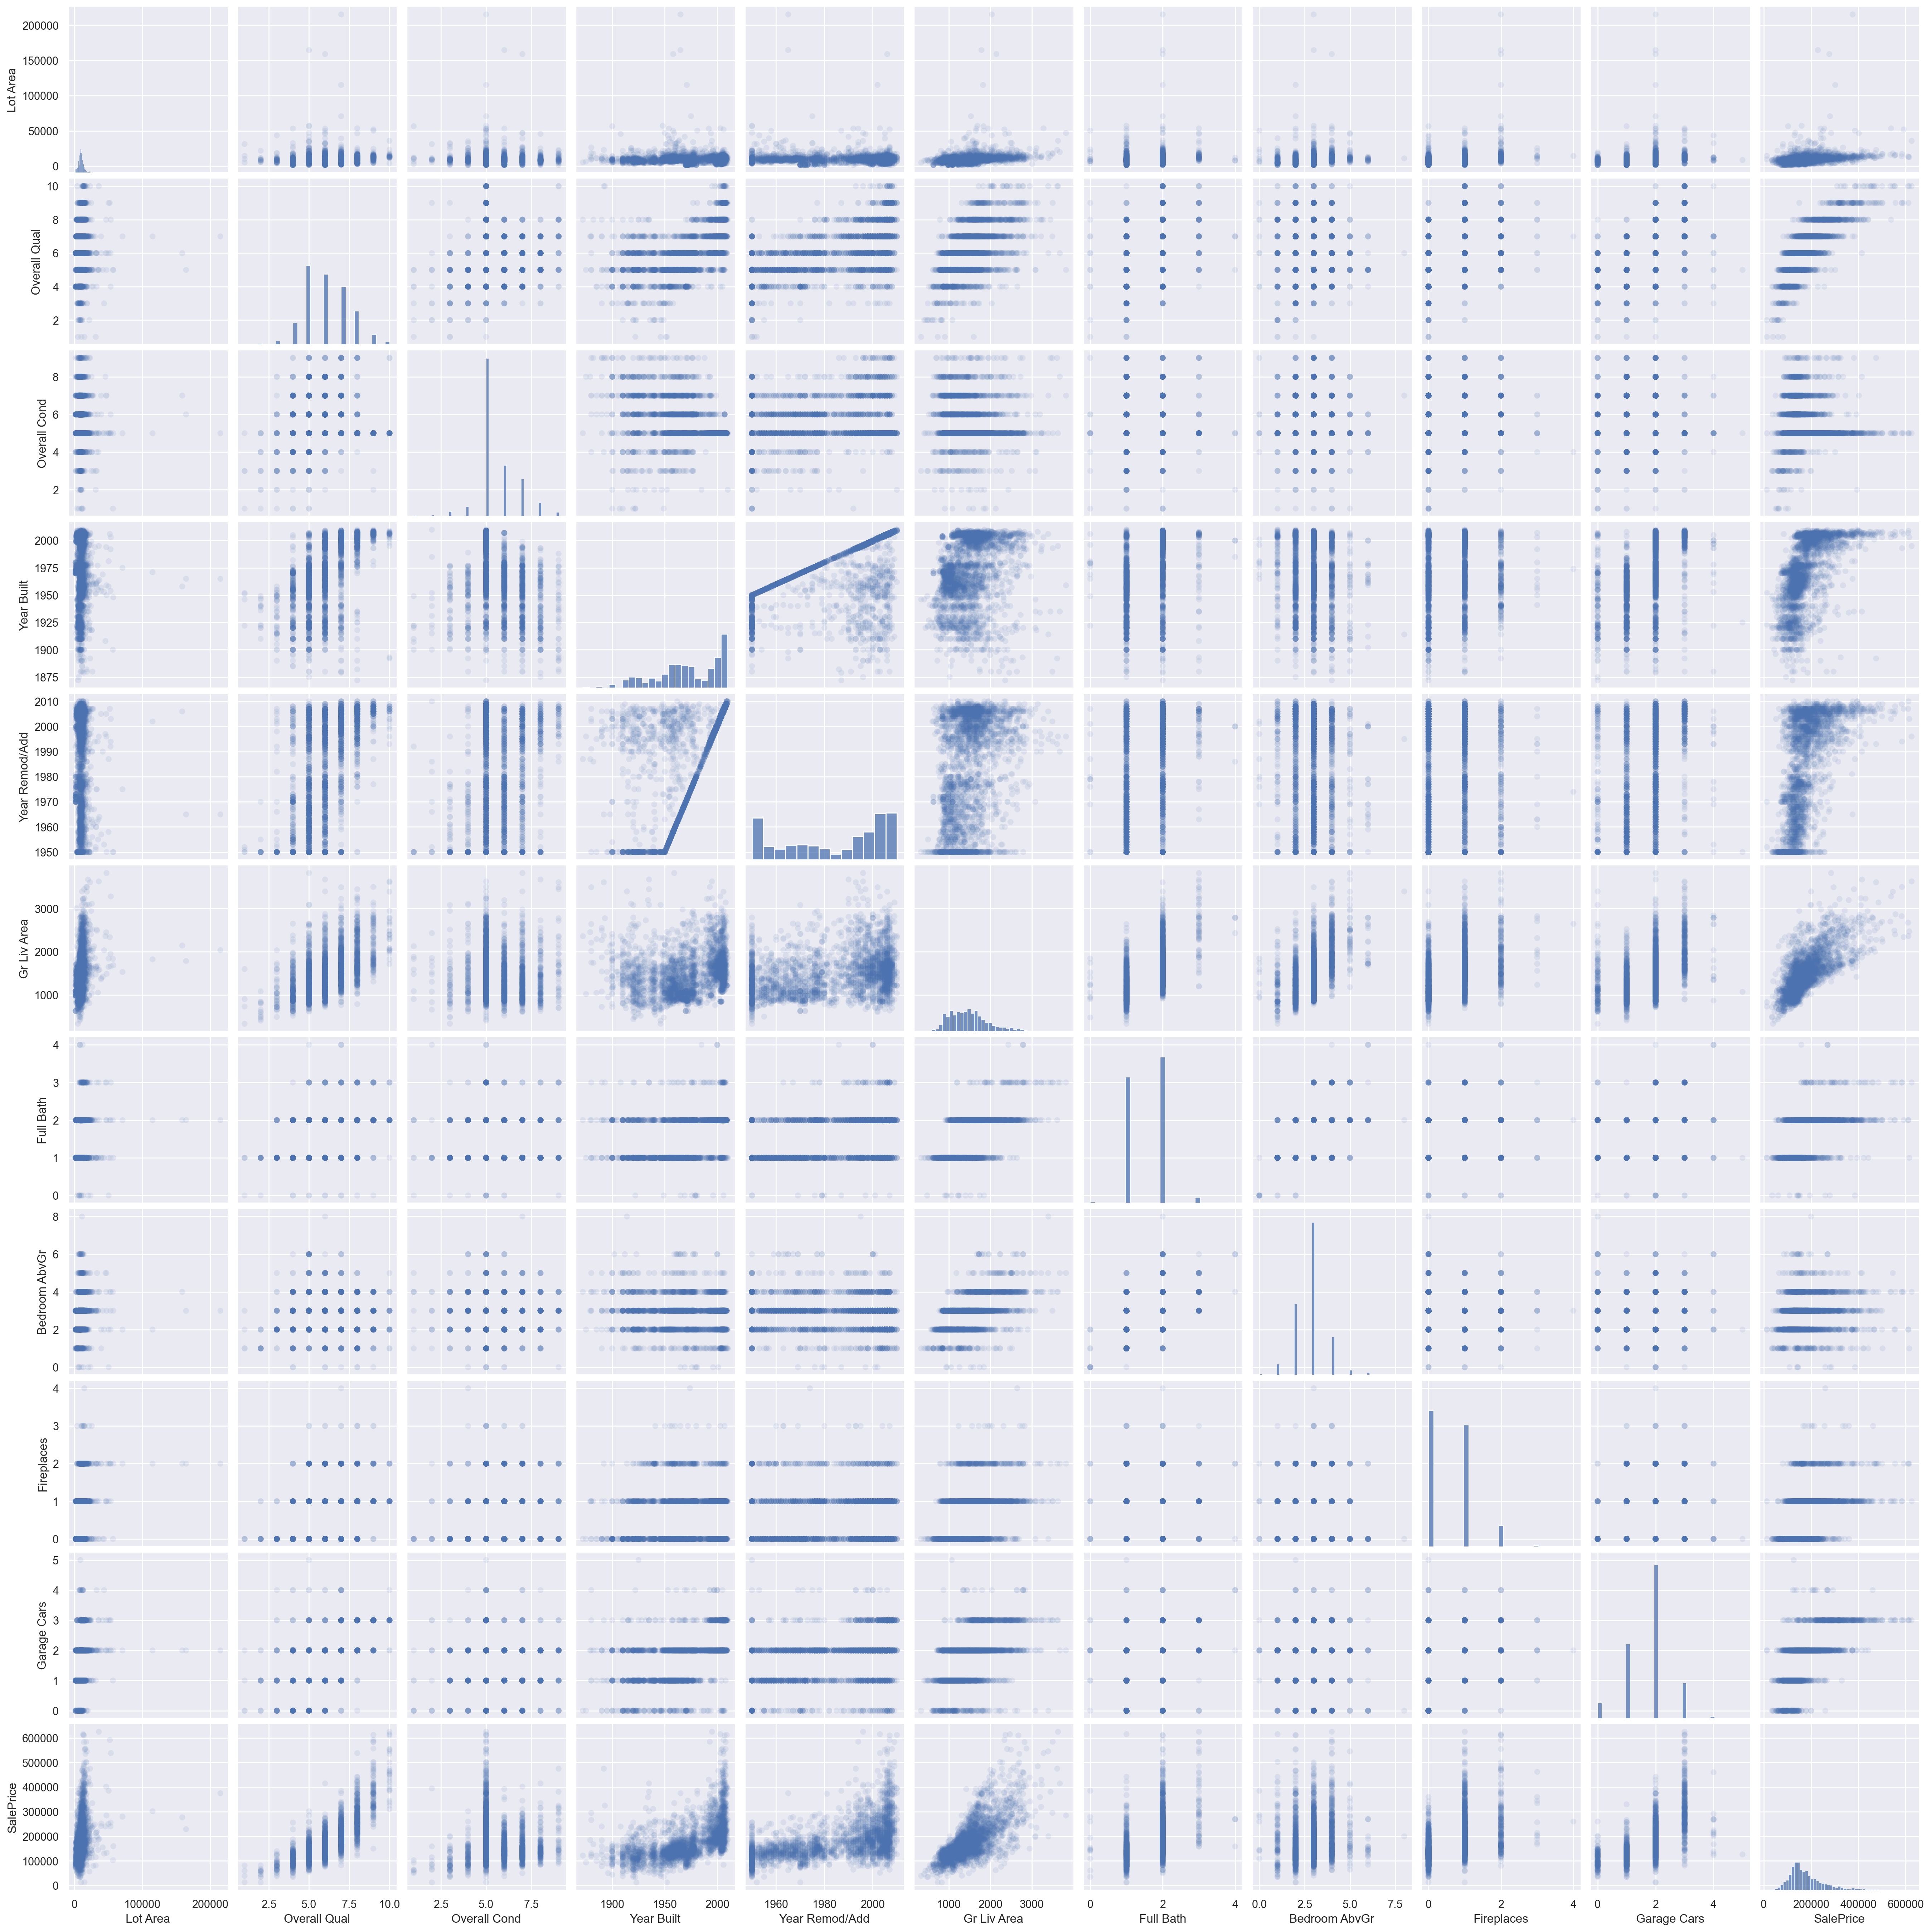

In [121]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

---
**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

---

#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.

In [122]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                        'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                        'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                        'Garage Cars']]

y = smaller_df['SalePrice']

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2926 non-null   int64  
 1   Overall Qual    2926 non-null   int64  
 2   Overall Cond    2926 non-null   int64  
 3   Year Built      2926 non-null   int64  
 4   Year Remod/Add  2926 non-null   int64  
 5   Gr Liv Area     2926 non-null   int64  
 6   Full Bath       2926 non-null   int64  
 7   Bedroom AbvGr   2926 non-null   int64  
 8   Fireplaces      2926 non-null   int64  
 9   Garage Cars     2926 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.5 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model. 

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward. 

Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.

### Basic feature engineering: adding polynomial and interaction terms

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets. 
### Polynomial Features

In [124]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2


As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions

In [125]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']



-----
**Interaction Feature Exercise**: What other interactions do you think might be helpful? Why? 

-----

### Categories and features derived from category aggregates 

Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

### One-hot encoding for dummy variables:

In [126]:
# Get a Pd.Series consisting of all the string categorical features
df2 = data.copy()
one_hot_encode_cols = df2.select_dtypes(include=['object'])  # filtering by string categorical features

one_hot_encode_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 0 to 2930
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2926 non-null   object
 1   Street          2926 non-null   object
 2   Alley           198 non-null    object
 3   Lot Shape       2926 non-null   object
 4   Land Contour    2926 non-null   object
 5   Utilities       2926 non-null   object
 6   Lot Config      2926 non-null   object
 7   Land Slope      2926 non-null   object
 8   Neighborhood    2926 non-null   object
 9   Condition 1     2926 non-null   object
 10  Condition 2     2926 non-null   object
 11  Bldg Type       2926 non-null   object
 12  House Style     2926 non-null   object
 13  Roof Style      2926 non-null   object
 14  Roof Matl       2926 non-null   object
 15  Exterior 1st    2926 non-null   object
 16  Exterior 2nd    2926 non-null   object
 17  Mas Vnr Type    1152 non-null   object
 18  Exter Qual   

In [127]:
# Do the one hot encoding
print(df2.head())
df2 = pd.get_dummies(df2, columns=one_hot_encode_cols.columns.to_list(), drop_first=True)
df2.columns.to_list()

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      1  526301100           20        RL         141.0     31770   Pave   
2      2  526350040           20        RH          80.0     11622   Pave   
3      3  526351010           20        RL          81.0     14267   Pave   
4      4  526353030           20        RL          93.0     11160   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
2   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
4   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

['Order',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Insid

## One shot encoding of single column

In [128]:
df['House Style'].value_counts()

House Style
1Story    1481
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:

In [129]:
pd.get_dummies(df['House Style'], drop_first=True).head()

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer   SLvl
0   False    True   False   False   False   False  False
1   False    True   False   False   False   False  False
2   False    True   False   False   False   False  False
3   False    True   False   False   False   False  False
4   False    True   False   False   False   False  False

We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.

In [130]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

Neighborhood
NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

In [131]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [132]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

X4.Neighborhood.value_counts()


Neighborhood
NAmes      444
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: count, dtype: int64

#### Getting to fancier features

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!

In [133]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.

In [134]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')

X5

Lot Area  Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
0        31770             6             5        1960            1960   
1        31770             6             5        1960            1960   
2        11622             5             6        1961            1961   
3        14267             6             6        1958            1958   
4        11160             7             5        1968            1968   
...        ...           ...           ...         ...             ...   
2926      7937             6             6        1984            1984   
2927      8885             5             5        1983            1983   
2928     10441             5             5        1992            1992   
2929     10010             5             5        1974            1975   
2930      9627             7             5        1993            1994   

      Gr Liv Area  Full Bath  Bedroom AbvGr  Fireplaces  Garage Cars  OQ2  \
0            1656          1              3           2          2.0   36   
1            1656          1              3           2          2.0   36   
2             896          1              2           0          1.0   25   
3            1329          1              3           0          1.0   36   
4            2110          2              3           2          2.0   49   
...           ...        ...            ...         ...          ...  ...   
2926         1003          1              3           0          2.0   36   
2927          902          1              2           0          2.0   25   
2928          970          1              3           0          0.0   25   
2929         1389          1              2           1          2.0   25   
2930         2000          2              3           1          3.0   49   

         GLA2  OQ_x_YB   OQ_/_LA Neighborhood House Style  \
0     2742336    11760  0.000189        NAmes      1Story   
1     2742336    11760  0.000189        NAmes      1Story   
2      802816     9805  0.000430        NAmes      1Story   
3     1766241    11748  0.000421        NAmes      1Story   
4     4452100    13776  0.000627        NAmes      1Story   
...       ...      ...       ...          ...         ...   
2926  1006009    11904  0.000756      Mitchel        SLvl   
2927   813604     9915  0.000563      Mitchel      1Story   
2928   940900     9960  0.000479      Mitchel      SFoyer   
2929  1929321     9870  0.000500      Mitchel      1Story   
2930  4000000    13951  0.000727      Mitchel      2Story   

      Year Built_Dev_House Style  Overall Qual_Dev_Neighborhood  
0                      -0.590065                       0.855829  
1                      -0.590065                       0.855829  
2                      -0.550909                      -0.432266  
3                      -0.668377                       0.855829  
4                      -0.276816                       2.143925  
...                          ...                            ...  
2926                    0.505068                       0.434947  
2927                    0.310526                      -0.518590  
2928                    1.096487                      -0.518590  
2929                   -0.041879                      -0.518590  
2930                    0.421480                       1.388483  

[2926 rows x 18 columns]

## Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`

In [135]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [137]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [138]:
pf.get_feature_names_out()

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [139]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

1  Lot Area  Overall Qual    Lot Area^2  Lot Area Overall Qual  \
0     1.0   31770.0           6.0  1.009333e+09               190620.0   
1     1.0   31770.0           6.0  1.009333e+09               190620.0   
2     1.0   11622.0           5.0  1.350709e+08                58110.0   
3     1.0   14267.0           6.0  2.035473e+08                85602.0   
4     1.0   11160.0           7.0  1.245456e+08                78120.0   
...   ...       ...           ...           ...                    ...   
2921  1.0    7937.0           6.0  6.299597e+07                47622.0   
2922  1.0    8885.0           5.0  7.894322e+07                44425.0   
2923  1.0   10441.0           5.0  1.090145e+08                52205.0   
2924  1.0   10010.0           5.0  1.002001e+08                50050.0   
2925  1.0    9627.0           7.0  9.267913e+07                67389.0   

      Overall Qual^2  
0               36.0  
1               36.0  
2               25.0  
3               36.0  
4               49.0  
...              ...  
2921            36.0  
2922            25.0  
2923            25.0  
2924            25.0  
2925            49.0  

[2926 rows x 6 columns]

## Recap

While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of [_Pareto principle_](https://en.wikipedia.org/wiki/Pareto_principle), where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model. 

# **Feature Engineering**


Estimated time needed: **45** minutes


A critical part of the successful Machine Learning project is coming up with a good set of features to train on. This process is called feature engineering, and it involves three steps: feature transformation (transforming the original features), feature selection (selecting the most useful features to train on), and feature extraction (combining existing features to produce more useful ones). In this notebook we will explore different tools in Feature Engineering.


## Objectives


After completing this lab you will be able to:


*   Understand the types of Feature Engineering
    *   Feature Transformation
        *   Dealing with Categorical Variables
            *   One Hot Encoding
            *   Label Encoding
        *   Date Time Transformations
    *   Feature Selection
    *   Feature Extraction using Principal Component Analysis


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`plotly.express`](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for machine learning and machine-learning-pipeline related functions.


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [140]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [141]:
# python library to work with excel files
# pip install openpyxl

In [142]:
# Surpress warnings from using older version of sklearn:
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **Reading and understanding our data**


For this lab, we will be using the airlines_data.xlsx file, hosted on IBM Cloud object. This dataset contains the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. This dataset is often used for prediction analysis of the flight prices which are influenced by various factors, such as name of the airline, date of journey, route, departure and arrival times, the source and the destination of the trip, duration and other parameters.

In this notebook, we will use the airlines dataset to perform feature engineering on some of its independent variables.


Let's start by reading the data into *pandas* data frame and looking at the first 5 rows using the `head()` method.


In [ ]:
data = pd.read_excel('data/airlines_data.xlsx')
data.head()

By using the `info` function, we will take a look at the types of data that our dataset contains.


In [ ]:
data.info()

As we see from the output above, we mostly have object data types, except for the 'price' column, which is an integer.


The `describe()` function provides the statistical information about the numerical variables. In our case, it is the 'price' variable.


In [ ]:
data.describe()

Next, we will check for any null values.


In [ ]:
data.isnull().sum()

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use `fillna()` and `method='ffill'`, which fills the last observed non-null value forward until another non-null value is encountered.


In [ ]:
data = data.ffill()
data.isnull().sum()

## **Feature Transformation**


Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.


### **Dealing with Categorical Variables**


Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. First, we'll start with 'Airlines' column, as it contains categorical values. We will use `unique()` method to obtain all the categories in this column.


In [ ]:
airlines = data['Airline'].unique().tolist()
airlines.sort()
airlines

From the above list, we notice that some of the airline names are being repeated. For example, 'Jet Airways' and 'Jet Airways Business'. This means that some of the airlines are subdivided into separate parts. We will combine these 'two-parts' airlines to make our categorical features more consistent with the rest of the variables.

Here, we will use the *numpy* `where()` function to locate and combine the two categories.


In [ ]:
data['Airline'] = np.where(data['Airline']=='Vistara Premium economy', 'Vistara', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])

## Exercise 1

In this exercise, use `np.where()` function to combine 'Multiple carriers Premium economy' and 'Multiple carriers' categories, like shown in the code above. Print the newly created list using `unique().tolist()` functions.


In [ ]:
# Enter your code and run the cell
data['Airline'] = np.where(data['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])

data['Airline'].unique().tolist()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data\['Airline'] = np.where(data\['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data\['Airline'])
data\['Airline'].unique().tolist()

</code>
</details>


#### **One Hot Encoding**


Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones. One way to do this is through *one hot encoding*. To learn more about this process, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

We will use, `get_dummies()` method to do this transformation. In the next cell, we will transform 'Airline', 'Source', and 'Destination' into their respective numeric variables. We will put all the transformed data into a 'data1' data frame.


In [ ]:
data1 = pd.get_dummies(data=data, columns = ['Airline', 'Source', 'Destination'])

In [ ]:
data1.head()

Below, we will compare our original data frame with the transformed one.


In [ ]:
data.shape

In [ ]:
data1.shape

As we can see, we went from 11 original features in our dataset to 28. This is because *Pandas* `get_dummies()` approach when applied to a column with different categories (e.g. different airlines) will produce a new column (variable) for each unique categorical value (for each unique airline). It will place a one in the column corresponding to the categorical value present for that observation.


## Exercise 2

In this exercise, use `value_counts()` to determine the values distribution of the 'Total_Stops' parameter.


In [ ]:
# Enter your code and run the cell
data1.Total_Stops.value_counts()


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data\["Total_Stops"].value_counts()

</code>
</details>


#### **Label Encoding**


Since 'Total_Stops' is originally a categorical data type, we also need to convert it into numerical one. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, like "0" to a "non-stop", using the `replace()` function.


In [ ]:
data1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data1.head()

### **Date Time Transformations**


#### **Transforming the 'Duration' time column**


Here, we will take a closer look at the 'Duration' variable. Duration is the time taken by a plane to reach its destination. It is the difference between the 'Dep_Time' and 'Arrival_Time'. In our dataset, the 'Duration' is expressed as a string, in hours and minutes. To be recognized by machine learning algorithms, we also need to transform it into numerical type.

The code below will iterate through each record in 'Duration' column and split it into hours and minutes, as two additional separate columns. Also, we want to add the 'Duration_hours' (in minutes) to the 'Duration_minutes' column to obtain a 'Duration_Total_mins' time, in minutes. The total duration time column will be useful feature for any regression type of analysis.


In [ ]:
duration = list(data1['Duration'])

# Checking if if the duration does not have 'h' or 'm' then add '0h' or '0m' respectively
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
            
dur_hours = []
dur_minutes = []  
# Extracting hours and minutes from duration
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))


data1['Duration_hours'] = dur_hours
data1['Duration_minutes'] =dur_minutes
data1.loc[:,'Duration_hours'] *= 60
data1['Duration_Total_mins']= data1['Duration_hours']+data1['Duration_minutes']

Print 'data1' data frame to see the newly created columns.


In [ ]:
data1.head().T

As you have noticed, three new columns were created: 'Duration_hours', 'Duration_minutes', and 'Duration_Total_mins' - all numerical values.


#### **Transforming the 'Departure' and 'Arrival' Time Columns**


Now, we will transform the 'Dep_Time' and 'Arrival_Time' columns to the appropriate date and time format. We will use *pandas* `to_datetime()` function for this.

We will split the 'Dep_Time' and 'Arrival_Time' columns into their corresponding hours and minutes columns.


In [ ]:
data1["Dep_Hour"]= pd.to_datetime(data1['Dep_Time'], format="%H:%M").dt.hour
data1["Dep_Min"]= pd.to_datetime(data1['Dep_Time'], format="%H:%M").dt.minute

## Exercise 3

Now, let's transform the 'Arrival_Time' column.


In [ ]:
# Enter your code and run the cell
data1["Arrival_Hour"]= pd.to_datetime(data1['Arrival_Time'], format="mixed").dt.hour
data1["Arrival_Min"]= pd.to_datetime(data1['Arrival_Time'], format="mixed").dt.minute

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\["Arrival_Min"]= pd.to_datetime(data1\['Arrival_Time']).dt.minute

</code>
</details>


#### **Splitting 'Departure/Arrival_Time' into Time Zones**


To further transform our 'Departure/Arrival_Time' column, we can break down the 24 hours format for the departure and arrival time into 4 different time zones: night, morning, afternoon, and evening. This might be an interesting feature engineering technique to see what time of a day has the most arrivals/departures.

One way to do this is transformation is by using *pandas* `cut()` function.


In [ ]:
data1['dep_timezone'] = pd.cut(data1.Dep_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data1['dep_timezone'] 

## Exercise 4

Now, let's transform the 'Arrival_Time' column into its corresponding time zones, as shown in the example above.


In [ ]:
# Enter your code and run the cell
data1['arrival_timezone'] = pd.cut(data1.Arrival_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data1['arrival_timezone']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\['arr_timezone'] = pd.cut(data1.Arrival_Hour, \[0,6,12,18,24], labels=\['Night','Morning','Afternoon','Evening'])

</code>
</details>


#### **Transforming the 'Date_of_Journey' Column**


Similar to the departure/arrival time, we will now extract some information from the 'date_of_journey' column, which is also an object type and can not be used for any machine learning algorithm yet.

So, we will extract the month information first and store it under the 'Month' column name.


In [ ]:
data1['Month']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.month

## Exercise 5

Now, let's create 'Day' and 'Year' columns in a similar way.


In [ ]:
# Enter your code and run the cell
data1['Year']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.year
data1['Day']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.day

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\['Day']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.day
data1\['Year']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.year

</code>
</details>


Additionally, we can extract the day of the weak name by using `dt.day_name()` function.


In [ ]:
data1['day_of_week'] = pd.to_datetime(data1['Date_of_Journey'], format="%d/%m/%Y").dt.day_name()

## **Feature Selection**


Here, we will select only those attributes which best explain the relationship of the independent variables with respect to the target variable, 'price'. There are many methods for feature selection, building the heatmap and calculating the correlation coefficients scores are the most commonly used ones.

First, we will select only the relevant and newly transformed variables (and exclude variables such as 'Route', 'Additional_Info', and all the original categorical variables), and place them into a 'new_data' data frame.


We will print all of our data1 columns.


In [ ]:
data1.columns

In [ ]:
new_data = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Price']]

new_data.head().T

Now we will construct a `heatmap()`, using the *seaborn* library with a newly formed data frame, 'new_data'.


In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

From the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other).


Now, we can use the `corr()` function to calculate and list the correlation between all independent variables and the 'price'.


In [ ]:
features = new_data.corr()['Price'].sort_values()
features

We can also plot these correlation coefficients for easier visualization.


In [ ]:
features.plot(kind='bar',figsize=(15,8))

From the graph above, we can deduct some of the highly correlated features and select only those ones for any future analysis.


## **Feature Extraction using Principal Component Analysis (Optional)**


### **PCA with Scikit-Learn**


Dimentionality reduction is part of the feature extraction process that combines the existing features to produce more useful ones. The goal of dimensionality reduction is to simplify the data without loosing too much information. Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms. First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In this way, a few multidimensional features are merged into one.

In the following portion of the lab, we will use `scikit-learn` library to perform some PCA on our data.
To learn more about `scikit-learn` PCA, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#sklearn.decomposition.PCA).


First, we must scale our data using the `StandardScaler()` function.
We will assign all the independent variables to x, and the dependent variable, 'price', to y.


In [ ]:
x = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min']]

In [ ]:
y= data1.Price

In [ ]:
scaler = StandardScaler()
x=scaler.fit_transform(x.astype(np.float64))
x

Once the data is scaled, we can apply the `fit_transform()` function to reduce the dimensionality of the dataset down to two dimensions.


In [ ]:
pca = PCA(n_components = 2)
pca.fit_transform(x)

### **Explained Variance Ratio**


Another useful piece of information in PCA is the explained variance ratio of each principal component, available via the `explained_variance_ratio_` function. The ratio indicates the proportion of the dataset's variance that lies along each principal component. Let's look at the explained variance ratio of each of our two components.


In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

The first component constitutes 17.54% of the variance and second component constitutes 12.11% of the variance between the features.


## Exercise 6 (Optional)

In this exercise, experiment with the number of components to see how many dimensions our dataset could be reduced to in order to explain most of the variability between the features. Additionally, you can plot the components using bar plot to see how much variability each component represents.


In [ ]:
# Enter your code and run the cell
pca = PCA(n_components = 7)
pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio_
explained_variance

In [ ]:
# Enter your code and run the cell
with plt.style.context('dark_background'):
    
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(7), explained_variance, alpha=0.5, align='center', 
    label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

<details>
<summary><strong>Solution_part1</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

pca = PCA(n_components = 7)
pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio\_
explained_variance

</code>
</details>


<details>
<summary><strong>Solution_part2</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

with plt.style.context('dark_background'):
    
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(7), explained_variance, alpha=0.5, align='center', 
    label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout() 


</code>
</details>


### **Choosing the Right Number of Dimensions**

Instead of arbitrary choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large proportion of the variance, let's say 95%.

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the variance.


In [ ]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1

In [ ]:
d

There are 16 components required to meet 95% variance. Therefore, we could set n_components = 16 and run PCA again. However, there is better way, instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve.


In [ ]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)

There is also a graphical way to determine the number of principal components in your analysis. It is to plot the explained variance as a function of the number of dimensions. There will usually be an elbow in the curve, where the explained variance stops growing fast. That point is usually the optimal point for the number of principal components.


In [ ]:
px.area(
    x=range(1, cumsum.shape[0] + 1),
    y=cumsum,
    labels={"x": "# Components", "y": "Explained Variance"}
)

## Section 1, Part e: Hypothesis Testing 

## Objectives: 

After this discussion, you should be able to: 
* Know the difference between a null and alternative hypothesis
* Write your own set of hypotheses for testing

In [ ]:
# See for more details on magic commands 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats 
import math

## Null Hypothesis

I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

How can we test it?

We do an experiment in which I call 100 coin flips. I get 57 right.

Am I special or not?


--- 

### Determining the Null and Alternative Hypothesis

Write the null and alternative hypotheses!

Null: 

Alternative:

---

**Null:** I'm not special; my true rate of flip prediction is 0.5. 

But even under this hypothesis, I could get 57 out of 100 right. So did I get lucky (by random chance) or am I mystical?

**Alternative:** My true rate of flip prediction is greater than 0.5.

The thing we're measuring from the experiment, or **test statistic**, is the number of correct flip predictions out of 100.

---

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 100` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 57 or more coin flips correct?

Before we check (really, before we do the experiment) we decide what would convince us that I have ESP. The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

---

We have two outcomes, one with probability (p) and the other with probability (1-p) of happening (remember the axioms of probability?), so we know the [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) [distribution](http://mathworld.wolfram.com/BinomialDistribution.html) is the [right tool for this analysis](https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html).

In the case of the binomial distribution, which is discrete and not too complicated mathematically, we could just work out the probability. But in general we'll rely on some existing functionality. (In a traditional statistics class, this is the part where we'd turn to a table in the back of the book.)

In [ ]:
from scipy.stats import binom
prob = 1 - binom.cdf(56, 100, 0.5)

print(str(round(prob*100, 1))+"%")

The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

---

Conversely, we can figure out what the 95% cutoff is beforehand.

--- 

### Exercise

Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant.

---

In [ ]:
from scipy.stats import binom
print(binom.ppf(0.95,100,0.5)+1)

Which means, one should get 59 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.

---

## A More Specific Claim

So far so good. What if instead I said, "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

What do we do in this case? Sure, we can do exactly what we did earlier and when I predict 57 times, we can reject my claim.

But what if I say, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

Interpretation:
> "I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"

What do we say to that? The issue here is that there is no longer a single null hypothesis that we prove or disprove. Instead, **we have two competing hypotheses**:
    * Hypothesis A: There is no predictive power
    * Hypothesis B: There is a 60% predictive power

Each is a normal curve, with one centered at 50% and the other at 60%.

In [ ]:
mu = 50
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(30,80)
plt.show()

**And 57 correct guesses falls within the 95% confidence of both the curves:**

In [ ]:
print (1 - binom.cdf(57, 100, 0.5))
print (binom.cdf(57, 100, 0.6))

What now? There just isn't enough data to achieve a confidence of 95%. There are few things we can do.

### 1) Decrease confidence


Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if I can predict over 55, then I have predictive power. This would mean that we have decreased our confidence level.

In [ ]:
print (1 - binom.cdf(55, 100, 0.5))
print (binom.cdf(54, 100, 0.6))

** At an 87% percent confidence level, we can say that I have some predictive power, since I got 57 tosses correct.**

Not ideal; we picked a number, which is prone to bias, rather than a confidence interval.

### 2) Be biased

But it is not neccessary that we bias the two hypotheses equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

For example, if we stuck with the original 95% on a coin being fair:

In [ ]:
print(binom.ppf(0.95, 100, 0.5)) #this is the inverse of the cdf functions above

Then our cutff is 58. Our two errors will be:

In [ ]:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. Which depending on the problem might be exactly what we want. These two types of errors are called Type I and Type II. And we have the choice of biasing against one or the other. 

### 3) Increase sample size

The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.

In [ ]:
mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(45,65)
plt.show()

The two normal curves are completely seperated now.

In [ ]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

---

### Exercise

What are our errors now?

---

In [ ]:
print (1-binom.cdf(550, 1000, 0.5))
print (binom.cdf(550, 1000, 0.6))

**With a cutoff of 550, both our errors come down to under 0.1%.**

# **Hypothesis Testing**


Estimated time needed: **30** minutes


Leveraging customer information is of paramount importance for most businesses. Imagine that you are an insurance analyst (actuarian) who needs to assess the insurability or the risks of his/her customers. Part of your job is to look at customer attributes such as age, sex, BMI, smokers/non-smokers, location, etc., and to use them in your decision-making process on whether to churn or approve their claims.

This lab will guide you through the series of steps in hypothesis testing to help you decide, using the statistical evidence, a certain effect of an attribute or a combination of attributes on the insurance claims. This lab will only introduce you to the initial steps in the decision making, before building the prediction models and classifiers.


## Objectives


After completing this lab you will be able to:


*   Understand the elements of hypothesis testing
    *   Choose a sample statistic
    *   Define hypothesis
    *   Set the decision criteria
    *   Evaluate and interpret the results


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.
*   [`statsmodels`](https://www.statsmodels.org/stable/index.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for statistical analysis.


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

## **Reading and understanding our data**


For this lab, we will be using the <code>insurance.csv</code> file, hosted on IBM Cloud object.

This dataset contains information about age, sex, BMI, the number of children, whether the client is smoker or non-smoker, region where the client lives, and the charges to their insurance company.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [ ]:
data = pd.read_csv("data/insurance.csv")
data.head()

By using `info` function, we will take a look at our types of data.


In [ ]:
data.info()

The `describe()` function provides the statistical information about the numeric variables.


In [ ]:
data.describe()

According to the brief preview of our data, we will define the 'charges' to be our response variable, and 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' to be our predictor variables. In this lab, we will test how our predictor variables influence the insurance 'charges'.


## **Steps in Hypothesis Testing**


## Example 1

In this first example, we will show how to prove (or disprove), with statistical evidence, that the BMI of females is different from that of males.


### 1. Choose a sample statistic


The first step in hypothesis testing is to choose a sample test statistic. Hypothesis testing allows us to check the sample statistic against a statistic of another sample or population. Let  𝜇1 be the population mean for BMI of males and 𝜇2 be the the population mean for BMI of females. We will compare these mean values, :$\mu\_{1}$ and $\mu\_{2}$, statistically.


### 2. Define hypothesis (Null and Alternative)


The next step is to define the hypothesis to be tested. Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.


$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the BMI of male and BMI of female. \
$ 𝐻_{A}:\mu_{1}-\mu_{2} != 0 $ There is difference between the BMI of male and BMI of female.


The equal sign in the null hypothesis indicates that it is a 2-tailed test.


### 3. Set the decision criteria


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Hypothesis_Testing_3.png)


To set the criteria for a decision, we state the level of significance for a test. It could be 5%, 1% or 0.5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

The diagram above describes the principles of hypothesis testing. We will choose 5% significance level. Therefore, our $ \alpha=0.05 $. Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025. So, if the calculated p-value is less than alpha, we will reject the null hypothesis. The significance level is based on the business requirements. If you would like to learn more about the statistical significance, please visit this [wikipedia link](https://en.wikipedia.org/wiki/Statistical_significance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

In this lab, we will use one of the t-test, z-score, f-score or chi-squared statistics to evaluate our results.

A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know standard deviation of the the population and when you have a limited sample (n < 30). If you know the standard deviation of the populations , you may use a z-test.

A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations, with large (n ≥ 30) samples, whether you know the population standard deviation or not. It is also used for testing the proportion of some characteristic versus a standard proportion, or comparing the proportions of two populations.

An f-test is used to compare variances between 2 populations. The samples can be any size. It is the basis of ANOVA.

chi-squared test is used to determine whether there is a statistically significant difference between the expected and the observed frequencies in one or more categories of a contingency table. A contingency table is a tabular representation of categorical data. It shows the frequency distribution of the variables.

To learn more about [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), [z-score](), [f-score](https://en.wikipedia.org/wiki/F-test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) or [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_test?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) statistics and [contingency tables](https://en.wikipedia.org/wiki/Contingency_table?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01), please visit their corresponding wikipedia links.


### 4. Evaluate and interpret the result


First, let's get all observations for females and males by using the `loc()` function.


In [ ]:
female=data.loc[data.sex=="female"]
male=data.loc[data.sex=="male"]

Now, let's select the bmi values for females and males.


In [ ]:
f_bmi = female.bmi
m_bmi = male.bmi

Now, we will plot the distribution of 'bmi' values for females and males using seaborn's `distplot()` function.


In [ ]:
sns.kdeplot(f_bmi, color='green', label='Female BMI')
sns.kdeplot(m_bmi, color='red', label='Male BMI')


From the graph, we already see that the two distributions are very similar.


Now, let's calculate the mean values for females and males bmi.


In [ ]:
female.bmi.mean()

In [ ]:
male.bmi.mean()

Next, we will obtain our statistics, t-value and p-value. We will use `scipy.stats` library and `ttest_ind()` function to calculate these parameters.


In [ ]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

Next, although optional, it is useful to print 'if/else' statements to make our conclusions about the the hypothesis.


In [ ]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: We fail to reject the null hypothesis and can conclude that there is no difference between the female and male bmi.


## Example 2

In this example, we would like to prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't.


We will compare the mean values (𝜇) of population of people who smoke and those who do not smoke. First, we need to calculate the mean values of smoking and non smoking populations.


In [ ]:
smoker = data.loc[data.smoker=="yes"]
smoker_char = smoker.charges
sch_mean = smoker_char.mean()
sch_mean

In [ ]:
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_char = nonsmoker.charges

## Exercise 1

Calculate population mean of the nonsmokers.


In [ ]:
# Enter your code below and run the cell
nsch_mean = nonsmoker_char.mean()
nsch_mean

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

nsch_mean = nonsmoker_char.mean()
nsch_mean

</code>
</details>


Now, let's define our null and alternative hypothesis.


$ 𝐻_{0}:\mu_{1}<=\mu_{2} $ The average charges of smokers are less than or equal to nonsmokers. \
$ 𝐻_{A}:\mu_{1}>\mu_{2} $ The average charges of smokers are greater than or equal to nonsmokers.


The '>' sign in the alternate hypothesis indicates the test is right tailed. To compare the mean values of smoking and nonsmoking populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.


Now, let's plot our smoking versus nonsmoking populations by using *seaborn* `boxplot()` function. It is always useful to have a visual representation of the data that we are working with.


In [ ]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

Now, we will calculate t-value and p-value of charges for smoking and nonsmoking populations.


In [ ]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

## Exercise 2

Use `print()` function to state your conclusions based on the calculated statistics. What are the conclusions?


In [ ]:
# Enter your code and run the cell
if p_value2 < alpha:
    print("Conclusion:Since p_value {} is less than alpha {} ".format (p_value_onetail,alpha) )
    print("Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.")

else:
    print("Conclusion:Since p value {} is greater than alpha {} ".format (p_value_onetail,alpha))
    print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

if p_value2 \<alpha :
print("Conclusion:Since p_value {} is less than alpha {} ".format (p_value_onetail,alpha) )
print("Reject null hypothesis that average charges for smokers are less than or equal to nonsmokers.")

else:
print("Conclusion:Since p value {} is greater than alpha {} ".format (p_value_onetail,alpha))
print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")

</code>
</details>


## Example 3

In this example, using the statistical evidence, we will compare the BMI of women with no children, one child, and two children.


Now, let's define our null and alternative hypothesis.


$ 𝐻_{0}:\mu_{1}=\mu_{2}=\mu_{3} $ The mean BMI of women with no children , one child, and two children are the same. \
$ 𝐻_{A}: $ At least one of the means for women's BMI is not the same.


For this example, we will use a one-way ANOVA and f-score statistic to evaluate the variances of these three different populations. We will set alpha value to be 0.05.

First, we need to filter data for women with 0, 1 and 2 children.


In [ ]:
female_children = female.loc[female['children']<=2]

We will use `groupby()` function to group the information by the number of children and bmi values.


In [ ]:
female_children.groupby([female_children.children]).bmi.mean()

## Exercise 3

In this exercise, draw the *boxplots* to visualize the difference in bmi values between these 3 groups.


In [ ]:
# Enter your code and run the cell
sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

</code>
</details>


Now, we will construct the ANOVA table and check for each groups count (0,1,2 children) against the bmi values. We will use the ols (ordinary least squares) model for estimation of the unknown parameters. To learn more about OLS, please visit this wikipedia [link](https://en.wikipedia.org/wiki/Ordinary_least_squares?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [ ]:
formula = 'bmi ~ C(children)'
model = ols(formula, female_children).fit()
aov_table = anova_lm(model)
aov_table

Conclusion. p-value is 0.715858 and it is greater than the alpha (0.05), therefore we fail to reject the null hypothesis and conclude that the mean bmi of women with no children, one child, and two children are the same.


## Example 4

In this example, we will determine if the proportion of smokers is significantly different across the different regions.


First, let's define our null and alternative hypothesis.


$ 𝐻_{0} $: Smokers proportions are not significantly different across the different regions. \
$ 𝐻_{A} $: Smokers proportions are different across the different regions.


Here, we are comparing two different categorical variables, smokers/nonsmokers and different regions. For this type of analysis, we will perform a chi-square test.


First, we will calculate a contingency table between the proportions of smokers in different regions. For this, we will use *pandas* `crosstab()` function.


In [ ]:
contingency= pd.crosstab(data.region, data.smoker)
contingency

Next, let's plot the distribution of nonsmokers/smokers across 4 different regions using the `plot()` function.


In [ ]:
contingency.plot(kind='bar')

Now, using `chi2_contingency()` method, from the *scipy.stats* `chi2_contingency`, we will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.


In [ ]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

## Exercise 4

Based on the above results, print your conclusion statements whether to reject or accept the null hypothesis. What are your conclusions about the hypothesis?


In [ ]:
# Enter your code and run the cell
if (p_val < 0.05):
    print('Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')
else:
    print('Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions')

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

if (p_val < 0.05):
print('Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')
else:
print('Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions')

</code>
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

Conclusion: We failed to reject that the proportions of smokers are not significantly different across different regions. Therefore, the proportions of smokers are different across different regions.

</code>
</details>
